<a href="https://colab.research.google.com/github/jeremysb1/data_analysis_projects/blob/main/categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

I am researching how engineers/developers are currently using generative AI tools.

Two considerations I have made:

1.  New and experienced coders are using these tools differently from each other,
2.  People's opinions on the usefulness and trustworthiness of current AI tools depend on their experience, job role, and what specifically they use the tools for.

A Minimum Viable Answer should be evidence to support or falsify these considerations.

Therefore:

Any conclusions should include whether or not there is a difference in the use of AI across different levels of experience.

I should communicate the factors that affect a person's opinion of, and trust in, AI tools, as supported by the survey data.

There are two kinds of output to create:

1. Evidence for whether there is a difference in the use of AI tools between developers of different experience levels;

2. Analysis of the factors that determine someone's score when assessing the usefulness and trust of AI tools.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

survey = pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Categorical Data/survey_results_public.csv')
print(survey.shape)
survey.head()

(89184, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
survey.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [3]:
data_dict = pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Categorical Data/survey_results_schema.csv')
data_dict.head(10)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [4]:
len(set(survey.columns).intersection(set(data_dict["qname"])))

50

In [5]:
set(survey.columns) - set(data_dict["qname"])

{'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'AINextNeither different nor similar',
 'AINextSomewhat different',
 'AINextSomewhat similar',
 'AINextVery different',
 'AINextVery similar',
 'AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIToolCurrently Using',
 'AIToolInterested in Using',
 'AIToolNot interested in Using',
 'ConvertedCompYearly',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'ResponseId',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith'}

In [6]:
data_dict[data_dict["force_resp"] == True]

,qid,qname,question,force_resp,type,selector
3,QID312,Q120,,True,MC,SAVR
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
11,QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
22,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
23,QID50,Currency,Which currency do you use day-to-day? If your ...,True,MC,DL
39,QID266,NEWSOSites,Which of the following Stack Overflow sites ha...,True,MC,MAVR
46,QID314,AISelect,Do you currently use AI tools in your developm...,True,MC,SAVR
54,QID299,TBranch,"<span style=""font-size:16px;"">Would you like t...",True,MC,SAVR


In [7]:
survey[survey["EdLevel"].isnull()]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,305,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,734,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,876,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88820,88821,I agree,None of these,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88828,88829,I agree,None of these,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88830,88831,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89028,89029,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
survey[survey["EdLevel"].isnull()].isnull().sum(axis=1).sort_values()

0        80
65302    80
65252    80
65037    80
64859    80
         ..
43794    80
43573    80
43567    80
43519    80
89159    80
Length: 1211, dtype: int64

In [9]:
survey = survey.dropna(subset=survey.columns[4:], how="all")

In [10]:
survey.isnull().sum().loc[lambda x: x==0]

ResponseId    0
Q120          0
MainBranch    0
Age           0
EdLevel       0
Country       0
NEWSOSites    0
AISelect      0
dtype: int64

In [11]:
survey[survey["Currency"].isnull()].isnull().sum(axis=1)

9        33
35       51
46       42
47       52
49       36
         ..
89173    16
89176    37
89180    33
89181    54
89182    30
Length: 22639, dtype: int64

## Understanding what proportion of people are using AI tools

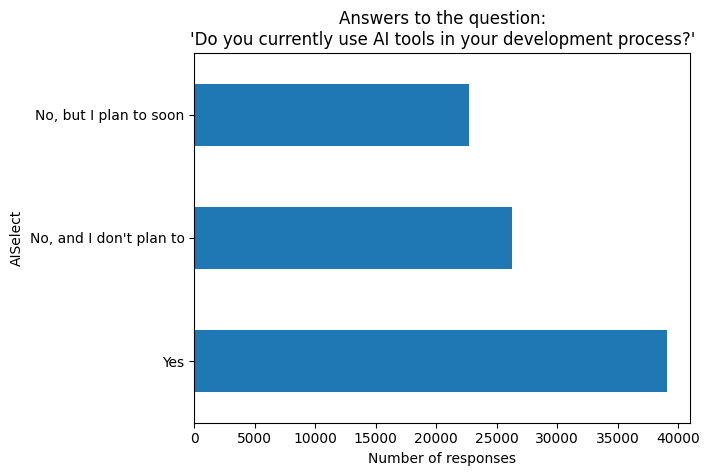

In [12]:
fig, axis = plt.subplots()

(
    survey["AISelect"]
    .value_counts(dropna=False)
    .plot
    .barh(ax=axis)
)

axis.set(title="Answers to the question:\n'Do you currently use AI tools in your development process?'",
         xlabel="Number of responses")

plt.show()

## AI Sentiment and Trustworthiness

Checking out the distribution of the AISent column to identify how people answered.

In [13]:
survey["AISent"].value_counts(dropna=False)

AISent
Favorable           29863
NaN                 26472
Very favorable      17050
Indifferent         10147
Unsure               2471
Unfavorable          1698
Very unfavorable      272
Name: count, dtype: int64

In [14]:
survey["AISent"] = (
    pd.Categorical(
        survey["AISent"].fillna("No answer given"),
        categories=['No answer given', 'Unsure',
                    'Very unfavorable', 'Unfavorable',
                    'Indifferent', 'Favorable', 'Very favorable'],
        ordered=True)
)

survey["AISent"].value_counts(dropna=False).sort_index()

AISent
No answer given     26472
Unsure               2471
Very unfavorable      272
Unfavorable          1698
Indifferent         10147
Favorable           29863
Very favorable      17050
Name: count, dtype: int64

In [15]:
pd.crosstab(
    index=survey["AISelect"],
    columns=survey["AISent"]
)

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
AISelect,,,,,,,
"No, and I don't plan to",26221,0,0,0,0,0,0
"No, but I plan to soon",155,1762,129,927,5858,10790,3089
Yes,96,709,143,771,4289,19073,13961


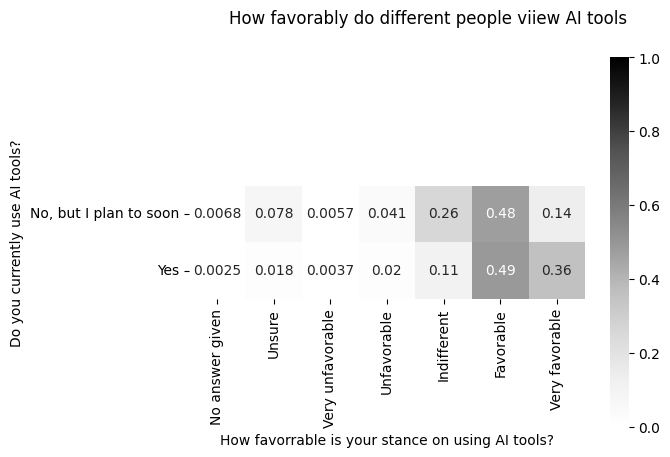

In [16]:
fig, axis = plt.subplots()

sns.heatmap(
    data=pd.crosstab(
        index=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISelect"],
        columns=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISent"],
        normalize="index"
    ),
    cmap="Greys",
    vmin=0,
    vmax=1,
    square=True,
    annot=True,
    ax=axis
)

fig.suptitle("How favorably do different people viiew AI tools")

axis.set(
    xlabel="How favorrable is your stance on using AI tools?",
    ylabel="Do you currently use AI tools?"
)

plt.show()

## Creating a resuable function to produce heatmaps

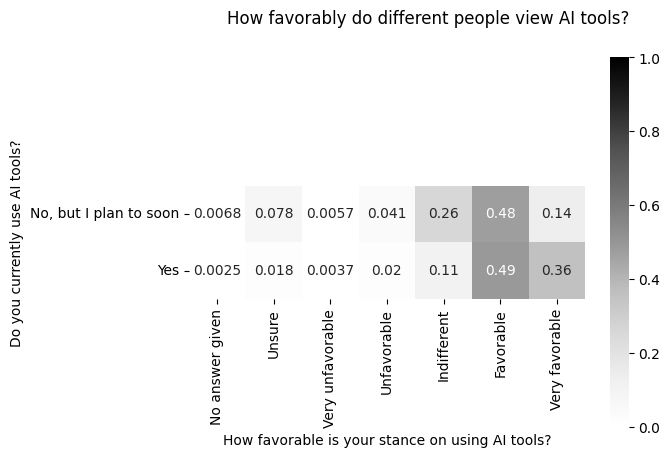

In [17]:
def create_heatmap(data, square=True):
    fig, axis = plt.subplots()

    sns.heatmap(
        data=data,
        cmap="Greys",
        vmin=0,
        vmax=1,
        square=square,
        annot=True,
        ax=axis
    )

    return fig, axis

fig, axis = create_heatmap(
    pd.crosstab(index=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISelect"],
        columns=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISent"],
        normalize="index")
)

fig.suptitle("How favorably do different people view AI tools?")

axis.set(
    xlabel="How favorable is your stance on using AI tools?",
    ylabel="Do you currently use AI tools?"
)

plt.show()

In [18]:
survey["AIBen"] = (
    pd.Categorical(
        survey["AIBen"].fillna("No answer given"),
        categories=['No answer given', 'Highly distrust',
                    'Somewhat distrust', 'Neither trust nor distrust',
                    'Somewhat trust', 'Highly trust'],
        ordered=True
    )
)

survey["AIBen"].value_counts(dropna=False).sort_index()

AIBen
No answer given               26577
Highly distrust                3350
Somewhat distrust             13330
Neither trust nor distrust    18837
Somewhat trust                24128
Highly trust                   1751
Name: count, dtype: int64

In [19]:
pd.crosstab(
    index=survey["AISelect"],
    columns=survey["AIBen"]
)

AIBen,No answer given,Highly distrust,Somewhat distrust,Neither trust nor distrust,Somewhat trust,Highly trust
AISelect,,,,,,
"No, and I don't plan to",26221,0,0,0,0,0
"No, but I plan to soon",202,1303,5975,8085,6764,381
Yes,154,2047,7355,10752,17364,1370


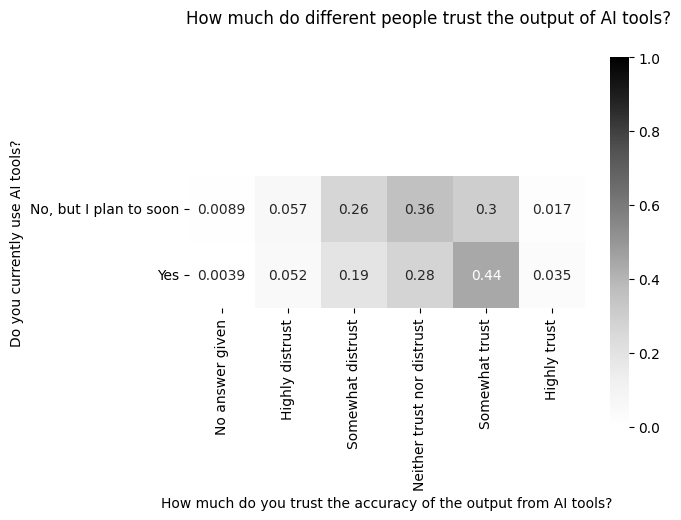

In [20]:
fig, axis = create_heatmap(
    pd.crosstab(
        index=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AISelect"],
        columns=survey.loc[survey["AISelect"] != "No, and I don't plan to", "AIBen"],
        normalize="index"
    )
)

fig.suptitle("How much do different people trust the output of AI tools?")

axis.set(
    xlabel="How much do you trust the accuracy of the output from AI tools?",
    ylabel="Do you currently use AI tools?"
)

plt.show()

In [21]:
(
    survey.loc[survey["AISelect"] == "Yes", "AIToolCurrently Using"]
    .dropna()
    .head(10)
)

1            Writing code;Committing and reviewing code
4     Learning about a codebase;Writing code;Documen...
5               Writing code;Debugging and getting help
6               Writing code;Debugging and getting help
7     Project planning;Writing code;Debugging and ge...
9               Writing code;Debugging and getting help
11                            Writing code;Testing code
13              Writing code;Debugging and getting help
15                                         Writing code
16                                         Writing code
Name: AIToolCurrently Using, dtype: object

In [22]:
ai_tool_indicators = (
    survey.loc[survey["AISelect"] == "Yes", "AIToolCurrently Using"]
    .str.get_dummies(sep=";")
)

ai_tool_indicators

,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
1,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,1
5,0,0,1,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
89176,0,0,0,0,1,1,0,1,0,1
89179,0,0,1,0,1,0,0,0,0,1
89180,0,0,1,0,0,1,0,0,0,0
89182,0,0,1,1,0,1,0,0,0,1


In [23]:
ai_tool_indicators.columns = [c.strip() for c in ai_tool_indicators.columns]

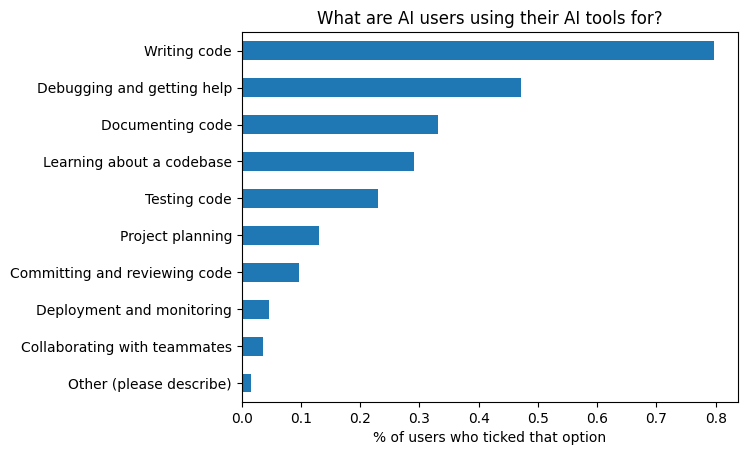

In [24]:
fig, axis = plt.subplots()

(
    ai_tool_indicators
    .mean()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="What are AI users using their AI tools for?",
    xlabel="% of users who ticked that option"
)

plt.show()

In [25]:
# concat will by default match on indices
survey_ai_users = (
    pd.concat([survey, ai_tool_indicators], axis=1)
    .dropna(subset=ai_tool_indicators.columns, how="any") #drop nulls
)

assert len(survey[survey["AISelect"] == "Yes"]) == len(survey_ai_users)

survey_ai_users.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
(
    survey_ai_users[survey_ai_users["Collaborating with teammates"] == 1]
    .groupby("AISent")
    .size()
    .reset_index(name="count")
    .assign(option="Collaborating with teammates")
)

,AISent,count,option
0,No answer given,0,Collaborating with teammates
1,Unsure,19,Collaborating with teammates
2,Very unfavorable,10,Collaborating with teammates
3,Unfavorable,12,Collaborating with teammates
4,Indifferent,99,Collaborating with teammates
5,Favorable,534,Collaborating with teammates
6,Very favorable,703,Collaborating with teammates


In [27]:
tool_favorability_dfs = []

for col in ai_tool_indicators.columns:
    option_df = (
        survey_ai_users[survey_ai_users[col] == 1]
        .groupby("AISent")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    tool_favorability_dfs.append(option_df)

options_vs_favorability = pd.concat(
    tool_favorability_dfs,
    axis=0,
    ignore_index=True
)

print(options_vs_favorability.shape)

(70, 3)


crosstab of favorability versus different AI tool use cases:

In [28]:
favorability_crosstab = (
    pd.crosstab(index=options_vs_favorability["option"],
                columns=options_vs_favorability["AISent"],
                values=options_vs_favorability["count"],
                aggfunc="sum",
                normalize="index")
)

favorability_crosstab

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
option,,,,,,,
Collaborating with teammates,0.000000,0.013798,0.007262,0.008715,0.071895,0.387800,0.510530
Committing and reviewing code,0.000788,0.011298,0.003678,0.008408,0.068050,0.392801,0.514976
Debugging and getting help,0.000651,0.014156,0.002658,0.013614,0.077019,0.464555,0.427347
Deployment and monitoring,0.001119,0.013423,0.006711,0.009508,0.064318,0.381991,0.522931
Documenting code,0.000386,0.011417,0.002314,0.010723,0.076294,0.446810,0.452056
Learning about a codebase,0.000441,0.014009,0.003348,0.012335,0.078767,0.441322,0.449780
Other (please describe),0.000000,0.034542,0.010363,0.044905,0.143351,0.436960,0.329879
Project planning,0.000785,0.012753,0.003335,0.010202,0.066706,0.404159,0.502060
Testing code,0.000556,0.011889,0.003444,0.010556,0.067778,0.433222,0.472556


heatmap comparing favorability across different AI tool use cases:

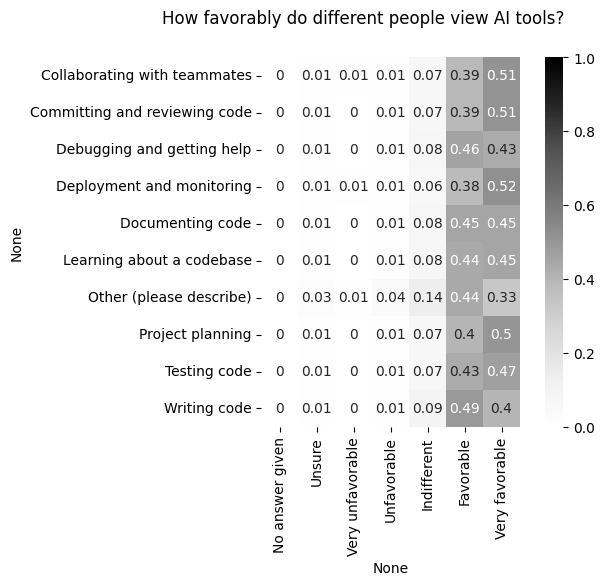

In [29]:
fig, axis = create_heatmap(
    favorability_crosstab.round(2)
)

fig.suptitle("How favorably do different people view AI tools?")

axis.set(xlabel="None", ylabel="None")

plt.show()

In [30]:
tool_trust_dfs = []
for col in ai_tool_indicators.columns:
    option_df = (
        survey_ai_users[survey_ai_users[col] == 1]
        .groupby("AIBen")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    tool_trust_dfs.append(option_df)

options_vs_trust = pd.concat(tool_trust_dfs, axis=0, ignore_index=True)

print(options_vs_trust.shape)
options_vs_trust.head()

(60, 3)


,AIBen,count,option
0,No answer given,2,Collaborating with teammates
1,Highly distrust,43,Collaborating with teammates
2,Somewhat distrust,143,Collaborating with teammates
3,Neither trust nor distrust,317,Collaborating with teammates
4,Somewhat trust,705,Collaborating with teammates


heatmap of different AI tool use cases versus view on trustworthiness:

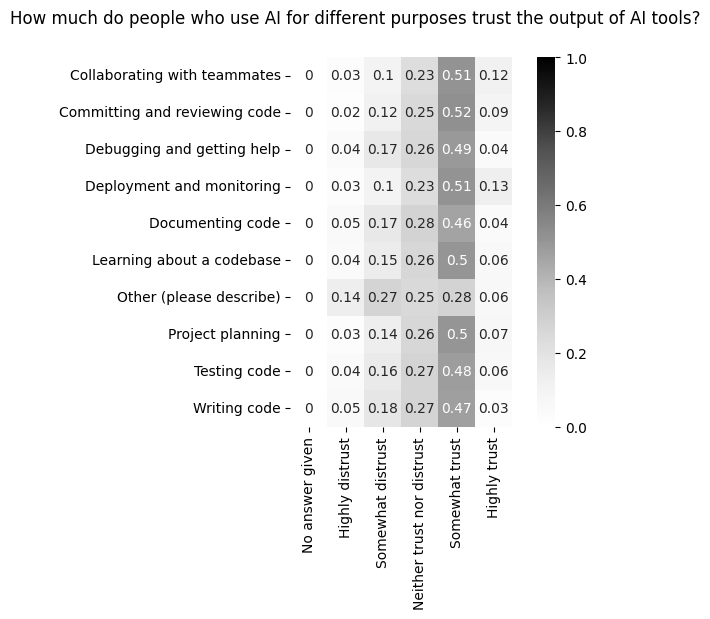

In [31]:
trust_crosstab = (
    pd.crosstab(index=options_vs_trust["option"],
                columns=options_vs_trust["AIBen"],
                values=options_vs_trust["count"],
                aggfunc="sum",
                normalize="index")
)

fig, axis = create_heatmap(trust_crosstab.round(2))

fig.suptitle("How much do people who use AI for different purposes trust the output of AI tools?")

axis.set(xlabel=None, ylabel=None)

plt.show()

In [32]:
survey_ai_users['DevType'].value_counts(dropna=False)

DevType
Developer, full-stack                            12316
NaN                                               5509
Developer, back-end                               5499
Developer, front-end                              2622
Other (please specify):                           1221
Developer, mobile                                 1126
Student                                           1106
Developer, desktop or enterprise applications     1087
Data scientist or machine learning specialist      953
Engineering manager                                823
Senior Executive (C-Suite, VP, etc.)               681
DevOps specialist                                  600
Academic researcher                                571
Engineer, data                                     534
Research & Development role                        500
Developer, embedded applications or devices        486
Cloud infrastructure engineer                      467
Data or business analyst                           349
De

In [33]:
devtypes = (
    survey_ai_users
    .dropna(subset=["DevType"])
    .query("DevType.str.startswith('Developer')")
    .loc[:, "DevType"]
)

devtypes.value_counts()

DevType
Developer, full-stack                            12316
Developer, back-end                               5499
Developer, front-end                              2622
Developer, mobile                                 1126
Developer, desktop or enterprise applications     1087
Developer, embedded applications or devices        486
Developer, game or graphics                        326
Developer, QA or test                              231
Developer Experience                               139
Developer Advocate                                  98
Name: count, dtype: int64

In [34]:
devtype_map = {}

dev_exclusions = ["Developer Experience", "Developer Advocate"]

dev_devtypes = [col for col in devtypes.value_counts().index if col not in dev_exclusions]

for col in dev_devtypes:
    devtype_map[col] = "Developer"

In [35]:
eng_devtypes = (
    survey_ai_users
    .dropna(subset=["DevType"])
    .query("DevType.str.contains('engineer', case=False)")
    .loc[:, "DevType"]
)

eng_devtypes.value_counts()

DevType
Engineering manager              823
Engineer, data                   534
Cloud infrastructure engineer    467
Engineer, site reliability       160
Hardware Engineer                 80
Name: count, dtype: int64

In [36]:
for col in ['Engineer, data', 'Cloud infrastructure engineer',
            'Engineer, site reliability', 'Hardware Engineer']:
    devtype_map[col] = "Engineer"

survey_ai_users["job_category"] = survey_ai_users["DevType"].replace(devtype_map)

survey_ai_users["job_category"].value_counts(dropna=False)

job_category
Developer                                        23693
NaN                                               5509
Engineer                                          1241
Other (please specify):                           1221
Student                                           1106
Data scientist or machine learning specialist      953
Engineering manager                                823
Senior Executive (C-Suite, VP, etc.)               681
DevOps specialist                                  600
Academic researcher                                571
Research & Development role                        500
Data or business analyst                           349
System administrator                               257
Project manager                                    232
Blockchain                                         200
Product manager                                    183
Educator                                           174
Security professional                              1

heatmap showing AI use cases across different job roles:

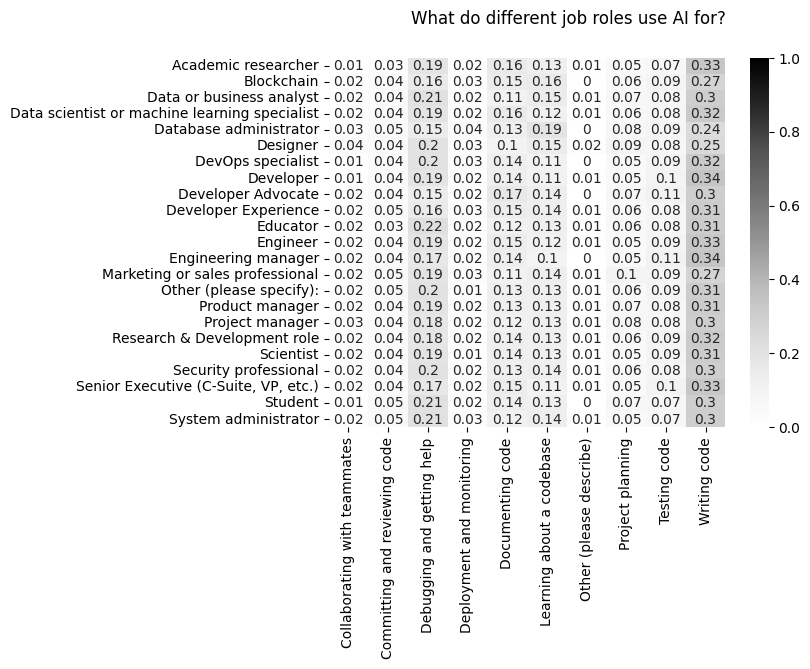

In [37]:
tool_job_dfs = []

for col in ai_tool_indicators.columns:
    option_df = (
        survey_ai_users[survey_ai_users[col] == 1]
        .dropna(subset="job_category")
        .groupby("job_category")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    tool_job_dfs.append(option_df)

options_vs_jobs = pd.concat(tool_job_dfs, axis=0, ignore_index=True)

job_crosstab = (
    pd.crosstab(index=options_vs_jobs["option"],
                columns=options_vs_jobs["job_category"],
                values=options_vs_jobs["count"],
                aggfunc="sum",
                normalize="columns")
    .transpose()
)

fig, axis = create_heatmap(
    job_crosstab.round(2),
    square=False
)

fig.suptitle("What do different job roles use AI for?")

axis.set(xlabel=None, ylabel=None)

plt.show()

The heatmap gives some insights into usage patterns:

About 30% of people use AI tools for writing code, with database administrators, marketing and sales professionals, and designers being an exception.

Database administrators use AI for learning about a codebase more than others.

Apart from them, other job roles that use AI for this the most are the ones that generally write less code, like marketing or product functions.


While developer advocates also use AI for writing code, they also score the highest in using it for documentation, which can be an important aspect of the role.


In [38]:
survey_ai_users["YearsCodePro"].unique()

array(['9', '4', '21', '3', '15', nan, 'Less than 1 year', '10', '2', '6',
       '14', '7', '5', '16', '20', '11', '12', '19', '8', '50', '27',
       '13', '1', '18', '44', '22', '25', '24', '17', '26', '37', '30',
       'More than 50 years', '23', '32', '39', '28', '35', '36', '33',
       '34', '41', '31', '40', '38', '29', '43', '42', '45', '48', '47',
       '49', '46'], dtype=object)

In [43]:
survey_ai_users["YearsCodePro"] = (
    survey_ai_users["YearsCodePro"]
    .replace({
        'Less than 1 year': 0,
        'More than 50 years': 50
    })
    .astype(float) # to account for NULLs
)

<Axes: >

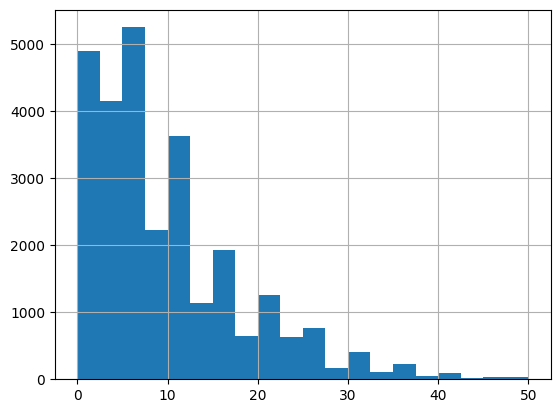

In [44]:
survey_ai_users["YearsCodePro"].hist(bins=20)

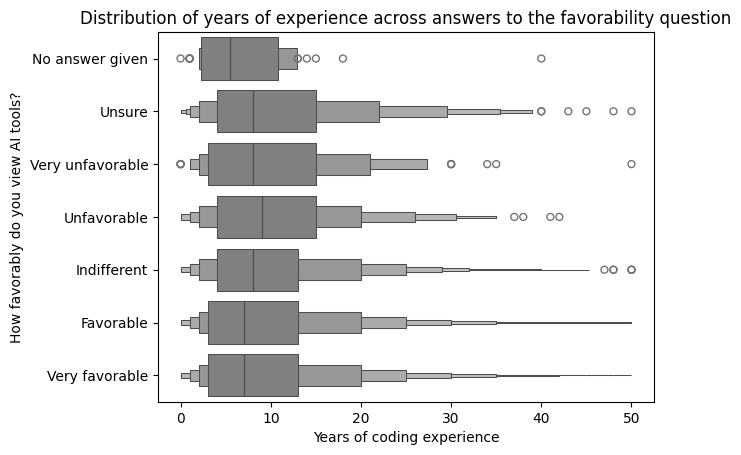

In [47]:
fig, axis = plt.subplots()

sns.boxenplot(
    data=survey_ai_users,
    x="YearsCodePro", y="AISent",
    color="gray",
    ax=axis
)

axis.set(
    title="Distribution of years of experience across answers to the favorability question",
    xlabel="Years of coding experience",
    ylabel="How favorably do you view AI tools?"
)

plt.show()

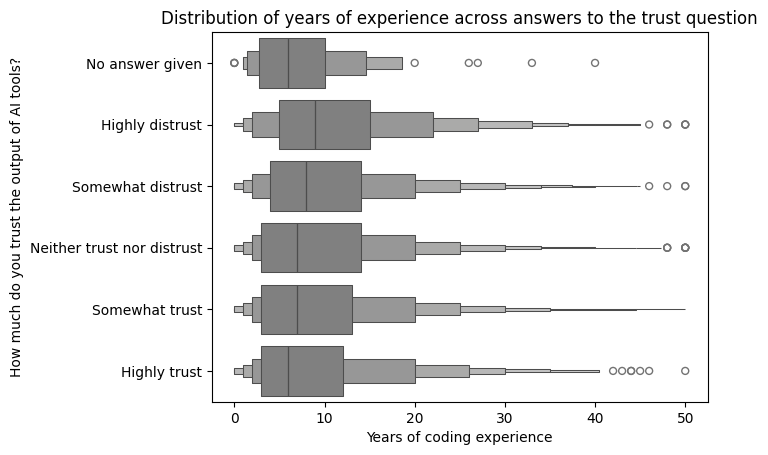

In [49]:
fig, axis = plt.subplots()

sns.boxenplot(
    data=survey_ai_users,
    x="YearsCodePro", y="AIBen",
    color="gray",
    ax=axis
)

axis.set(
    title="Distribution of years of experience across answers to the trust question",
    xlabel="Years of coding experience",
    ylabel="How much do you trust the output of AI tools?"
)

plt.show()

In [50]:
exp_bins = pd.cut(survey_ai_users["YearsCodePro"],
                  bins=[-1, 0, 2, 5, 10, 20, 50],
                  labels=["0", "1-2 years", "3-5 years",
                          "6-10 years", "11-20 years",
                          "over 20 years"]
                 )

survey_ai_users.groupby(exp_bins)["YearsCodePro"].agg(["min", "max"])

,min,max
YearsCodePro,,
0,0.0,0.0
1-2 years,1.0,2.0
3-5 years,3.0,5.0
6-10 years,6.0,10.0
11-20 years,11.0,20.0
over 20 years,21.0,50.0


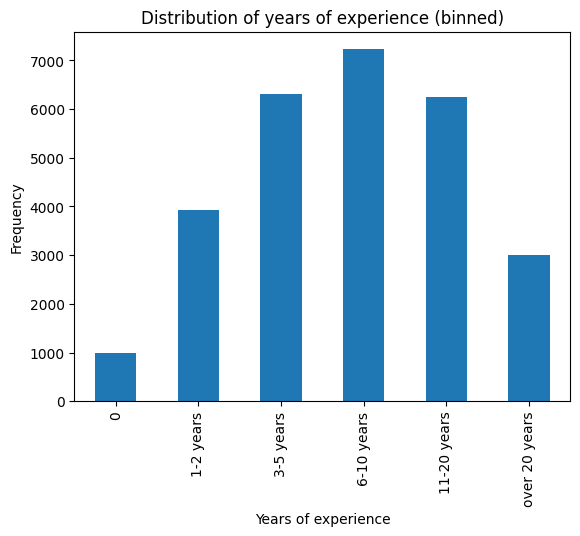

In [51]:
fig, axis = plt.subplots()

(
    exp_bins
    .value_counts()
    .sort_index()
    .plot
    .bar(ax=axis)
)

axis.set(
    title="Distribution of years of experience (binned)",
    xlabel="Years of experience",
    ylabel="Frequency"
)

plt.show()

In [52]:
exp_vs_sent = pd.crosstab(
    index=exp_bins,
    columns=survey_ai_users["AISent"],
    normalize="index"
)

exp_vs_sent

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
YearsCodePro,,,,,,,
0,0.001011,0.015167,0.004044,0.018200,0.104146,0.505561,0.351871
1-2 years,0.002552,0.017096,0.004083,0.015310,0.101046,0.510079,0.349834
3-5 years,0.001587,0.014596,0.001745,0.015865,0.104871,0.488974,0.372362
6-10 years,0.001384,0.016602,0.004289,0.019231,0.112618,0.476065,0.369812
11-20 years,0.001599,0.017426,0.003197,0.023341,0.112390,0.483933,0.358114
over 20 years,0.000332,0.021920,0.004318,0.020923,0.107938,0.474925,0.369645


The above is a crosstab of experience vs. answers to the favorability question.

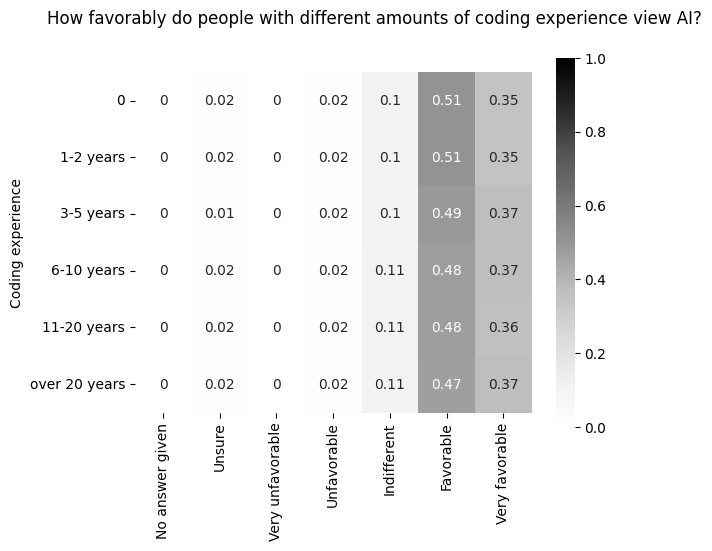

In [53]:
fig, axis = create_heatmap(exp_vs_sent.round(2))

fig.suptitle("How favorably do people with different amounts of coding experience view AI?")

axis.set(
    xlabel=None,
    ylabel="Coding experience"
)

plt.show()

In [56]:
exp_vs_trust = pd.crosstab(
    index=exp_bins,
    columns=survey_ai_users["AIBen"],
    normalize="index"
)

exp_vs_trust

AIBen,No answer given,Highly distrust,Somewhat distrust,Neither trust nor distrust,Somewhat trust,Highly trust
YearsCodePro,,,,,,
0,0.003033,0.040445,0.172902,0.266936,0.479272,0.037412
1-2 years,0.004083,0.039806,0.173258,0.282470,0.466956,0.033427
3-5 years,0.002856,0.044423,0.181501,0.278597,0.456132,0.036491
6-10 years,0.002905,0.058522,0.197842,0.288877,0.422939,0.028915
11-20 years,0.002238,0.064109,0.203197,0.296243,0.407834,0.026379
over 20 years,0.001328,0.076054,0.205912,0.279309,0.406177,0.031219


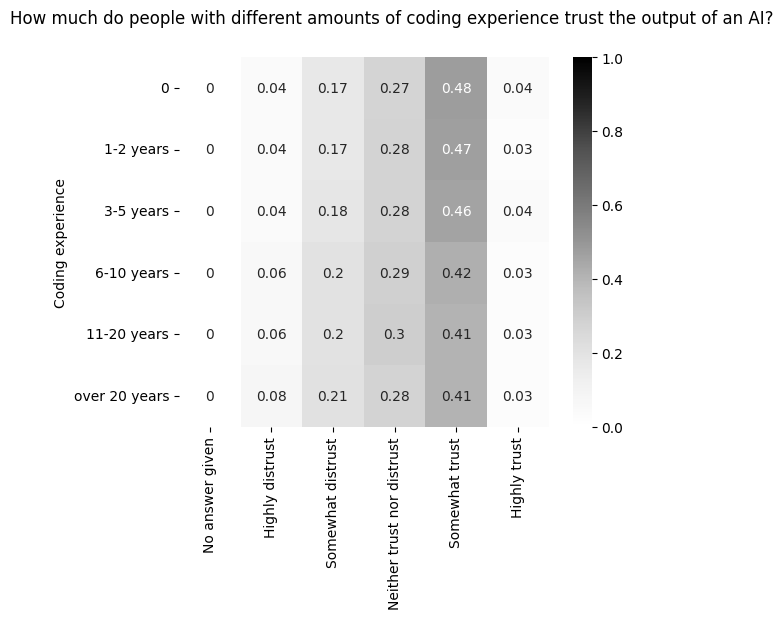

In [57]:
fig, axis = create_heatmap(exp_vs_trust.round(2)
)

fig.suptitle("How much do people with different amounts of coding experience trust the output of an AI?")

axis.set(
    xlabel=None,
    ylabel="Coding experience"
)

plt.show()

In [60]:
trust_exp_data = (
    survey_ai_users
    .dropna(subset=["YearsCodePro", "AIBen"], how="any")
    .loc[survey_ai_users["AIBen"] != "No answer given", :]
)

trust_rank = (
    pd.Series(
        trust_exp_data["AIBen"]
        .factorize(sort=True)[0]
    )
    .rank()
)

from scipy.stats import spearmanr, kendalltau

correlation, pvalue = spearmanr(
    trust_exp_data["YearsCodePro"],
    trust_rank
)

print("Spearman's\n", correlation, pvalue)

correlation, p_value = kendalltau(
    trust_exp_data["YearsCodePro"],
    trust_rank
)

print("Kendall's tau\n", correlation, p_value)

Spearman's
 -0.0650445414009189 2.6886332522054823e-27
Kendall's tau
 -0.05052236119624125 2.5557806077186822e-27
